# Project 1
- **Team Members**: Chika Ozodiegwu, Kelsey Wyatt, Libardo Lambrano, Kurt Pessa

![](Images/florida_covid19_data.jpg)

### Data set used:: 
* https://open-fdoh.hub.arcgis.com/datasets/florida-covid19-case-line-data


##### Dependencies

In [18]:
import step1_raw_data_collection as step1
import step2_data_processing_and_cleaning as step2

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

# Process of Data Analysis
![](Images/data_process.png)
## Step 1: Raw Data Collection
-----

In [24]:
df = step1.get_data()
#help(step1.get_data)

## Step 2: Data Processing & Data Cleaning
-----

##### Single group

In [28]:
#df = step2.get_hospitalized_data()
#df = step2.get_df_with_datetime_and_formatted_column()
#df = step2.get_hospitalizations_by_casedatetime()

#group_name = "Gender"
#group_name = "Age_group"
#group_name = "Travel_related"
#group_name = "Jurisdiction"
#group_name = "County"

df = step2.get_group(group_name)

df

,Travel_related,Hospitalized
0,No,17490
1,Unknown,2404
2,Yes,1075


##### Two groups: before and after opening

In [29]:
df1, df2 = step2.get_groups_before_and_after_opening_date()
#df1, df2 = step2.get_groups_by_casedatetime()

group_name = "Gender"
#group_name = "Age_group"
#group_name = "Travel_related"
#group_name = "Jurisdiction"
#group_name = "County"

df1,df2 = step2.get_groups(group_name)

#df
pd.concat([df1,df2],axis=1)


,Gender,Hospitalized,Gender,Hospitalized
0,Female,2513,Female,1772
1,Male,2745,Male,1717


In [ ]:
#clean csv

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Case1"]]
new_csv_data_df.head()

In [ ]:
#new_csv_data_df.to_csv(new_csv_data_df, 'new_cleaned_data.csv')

new_csv_data_df.to_csv ("new_covid_dataframe.csv") # index = False, header=True)

# There is no change in hospitalizations since reopening
### Research Question to Answer:
* “There is no change in hospitalizations since reopening” 

### Part 1: Six (6) Steps for Hypothesis Testing


#### 1. Identify
- **Populations** (divide Hospitalization data in two groups of data):
    1. Prior to opening
    2. After opening  
* Decide on the **date**:
    * May 4th - restaurants opening to 25% capacity

#### 2. State the hypotheses
- **H0**: There is no change in hospitalizations after Florida has reopened
- **H1**: There is a change in hospitalizations after Florida has reopened

#### 3. Characteristics of the comparison distribution
- Population means, standard deviations

In [20]:
df1, df2 = step2.get_groups(group_name = "CaseDateTime", opening_date = dt.datetime(2020,5,4), day_delta = 30, opening_day_shift = 0)

In [25]:
sample1 = df1['Hospitalized']
sample2 = df2['Hospitalized']
pd.DataFrame({
    "Before Opening:": sample1.describe(),
    "After Opening": sample2.describe()
}).style.format("{:.1f}")


,Before Opening:,After Opening
count,30.0,30.0
mean,175.3,116.3
std,48.6,26.6
min,100.0,63.0
25%,135.5,98.2
50%,171.0,114.5
75%,214.0,131.5
max,256.0,181.0


#### 4. Critical values
- p = 0.05
- Our hypothesis is nondirectional so our hypothesis test is **two-tailed**

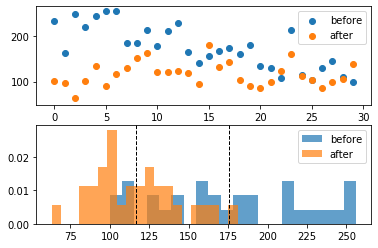

In [30]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(sample1)), sample1, label="before")
plt.scatter(range(len(sample2)), sample2, label="after")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(sample1, 20, density=True, alpha=0.7, label="before")
plt.hist(sample2, 20, density=True, alpha=0.7, label="after")
plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()

#### 5. Calculate

In [31]:
statistic, pvalue = stats.ttest_ind_from_stats(grouped_before["Hospitalized"].mean(),grouped_before["Hospitalized"].std(),grouped_before["Hospitalized"].size,grouped_after["Hospitalized"].mean(),grouped_after["Hospitalized"].std(),grouped_after["Hospitalized"].size)
print(f"p-value: {pvalue:.4f}")

p-value: 0.0006


#### 6. Decide
- We are able to reject the null hypothesis that there was no change.  With the data set we analyzed, there was a significant change from before to after reopening in Florida.

### Part 2: Visualization
* Trends

### Further Inquries
* Increases in groups?
* Age
* Gender
* Ethnicitiy

### Rough Breakdown of Tasks
* Data Massaging

In [ ]:
#Calculate total number of cases 
Total_covid_cases = new_csv_data_df["ObjectId"].nunique()
Total_covid_cases = pd.DataFrame({"Total Number of Cases": [Total_covid_cases]})
Total_covid_cases

In [ ]:
#Total number of cases by county (Kelsey) Include bar chart


In [ ]:
#Total number of cases by gender (Kelsey) Include pie chart 

#Top 10 counties with the most cases (Libardo)
![](Images/top_counties.png)

In [ ]:
#Divide hospitalization data in two groups of data prior to reopening and create new dataframe (Kurt) consider total (Chika)

In [ ]:
#Divide hospitalization data in two groups of data after reopening and create new dataframe (Kurt) condider total (Chika)

In [ ]:
#Total number of hospitalization for all counties (Libardo)

In [ ]:
#Total number of hospitalization for each county and put in DataFrame # Create a visualization (Kelsey)


In [15]:
#Percentage of hospitalization by gender # Create Visualization (Libardo)

df = step2.get_df_with_datetime_and_formatted_column()
filt = df['Gender']=='Male'
df = df[filt]
df = step2.get_hospitalizations_by_casedatetime(df)
male_by_week = df.groupby(pd.Grouper(freq='W',key='CaseDateTime')).sum()

df = step2.get_df_with_datetime_and_formatted_column()
filt = df['Gender']=='Female'
df = df[filt]
df = step2.get_hospitalizations_by_casedatetime(df)
female_by_week = df.groupby(pd.Grouper(freq='W',key='CaseDateTime')).sum()

male_perc = male_by_week['Hospitalized']/(male_by_week['Hospitalized']+female_by_week['Hospitalized'])*100
female_perc = female_by_week['Hospitalized']/(male_by_week['Hospitalized']+female_by_week['Hospitalized'])*100

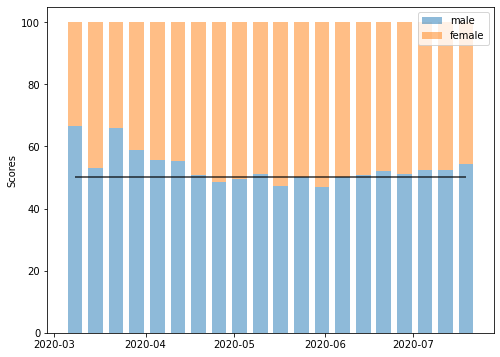

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
p1 = plt.bar(male_perc.index,male_perc,width=5,label='male',alpha=0.5)
p2 = plt.bar(female_perc.index,female_perc,bottom=male_perc,width=5,label='female',alpha=0.5)
plt.hlines(y=50,xmin=male_perc.index[0],xmax=male_perc.index[-1],alpha=0.8)
plt.ylabel('Scores')
plt.legend(handles=[p1,p2])
plt.show()

In [ ]:
#Percentage of hospitalization by age group (Chika) #Create visualization

In [ ]:
#Percentage of hospitalization before shut down (Not done yet) (Rephrase) (Chika)

In [ ]:
#Percentage of hospitalization during shut down (backburner)

In [ ]:
#Percentage of hospitalization after reopening(Not done yet) (Rephrase) (Chika)

In [ ]:
#Compare travel-related hospitalization to non-travelrelated cases (Not done yet) (Chika)

In [ ]:
#Average number of hospitalization by county (Not done yet) (Kelsey) 

#Hospitalization by case date/month (needs more) (Libardo) 
![](Images/hosp_by_case.png)